# Stack Overflow Survey Results 2023


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

colour_scheme = ['#C0ED42', '#FFE301', '#FFF352', '#FF85DA', '#FF69B3', '#A15AC4']

In [2]:
%matplotlib inline

### Loading the datasets into dataframes

In [3]:
results = pd.read_csv('survey_results_public.csv')
schema = pd.read_csv('survey_results_schema.csv')

In [4]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           89184 non-null  int64  
 1   Q120                                 89184 non-null  object 
 2   MainBranch                           89184 non-null  object 
 3   Age                                  89184 non-null  object 
 4   Employment                           87898 non-null  object 
 5   RemoteWork                           73810 non-null  object 
 6   CodingActivities                     73764 non-null  object 
 7   EdLevel                              87973 non-null  object 
 8   LearnCode                            87663 non-null  object 
 9   LearnCodeOnline                      70084 non-null  object 
 10  LearnCodeCoursesCert                 37076 non-null  object 
 11  YearsCode                   

In [5]:
schema

,qid,qname,question,force_resp,type,selector
0,QID16,S0,"<div><span style=""font-size:19px;""><strong>Hel...",False,DB,TB
1,QID12,MetaInfo,Browser Meta Info,False,Meta,Browser
2,QID310,Q310,"<div><span style=""font-size:19px;""><strong>You...",False,DB,TB
3,QID312,Q120,,True,MC,SAVR
4,QID1,S1,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
...,...,...,...,...,...,...
73,QID289,Knowledge_7,Waiting on answers to questions often causes i...,NaN,MC,MAVR
74,QID289,Knowledge_8,I feel like I have the tools and/or resources ...,NaN,MC,MAVR
75,QID290,Frequency_1,Needing help from people outside of your immed...,NaN,MC,MAVR
76,QID290,Frequency_2,Interacting with people outside of your immedi...,NaN,MC,MAVR


### In which industries do developers get paid the most? Which industry employs the highest number of people?

#### Finding the industries of the top 5 highest earning developers

In [6]:
results.ConvertedCompYearly.sort_values(ascending = False).head(5)

53268    74351432.0
77848    73607918.0
66223    72714292.0
28121    57513831.0
19679    36573181.0
Name: ConvertedCompYearly, dtype: float64

In [7]:
results.loc[results.ConvertedCompYearly.sort_values(ascending = False).head(5).index, ('Industry', 'ConvertedCompYearly')]

,Industry,ConvertedCompYearly
53268,"Information Services, IT, Software Development...",74351432.0
77848,Other,73607918.0
66223,NaN,72714292.0
28121,Financial Services,57513831.0
19679,NaN,36573181.0


While this does tell us that the highest earning developer comes from the 'Information Services, IT, Software Development, or other Technology' industry, it does not tell us much more about it as there is an 'Other' category as well as some null values.
A better measure will be to compare the average incomes of developers from all the industries.

In [8]:
# Getting all the industries
industries = pd.DataFrame(results['Industry'].value_counts().index)
industries

,Industry
0,"Information Services, IT, Software Development..."
1,Financial Services
2,Other
3,"Manufacturing, Transportation, or Supply Chain"
4,Healthcare
5,Retail and Consumer Services
6,Higher Education
7,Advertising Services
8,Insurance
9,Oil & Gas


In [9]:
results['Industry'].value_counts()

Industry
Information Services, IT, Software Development, or other Technology    18159
Financial Services                                                      4421
Other                                                                   4011
Manufacturing, Transportation, or Supply Chain                          2607
Healthcare                                                              2216
Retail and Consumer Services                                            1955
Higher Education                                                        1242
Advertising Services                                                     786
Insurance                                                                707
Oil & Gas                                                                276
Legal Services                                                           210
Wholesale                                                                184
Name: count, dtype: int64

In [10]:
# Computing the mean income of all the industries

it_avg = results.loc[results['Industry'] == 'Information Services, IT, Software Development, or other Technology', 'ConvertedCompYearly'].mean()
fin_avg = results.loc[results['Industry'] == 'Financial Services', 'ConvertedCompYearly'].mean()
oth_avg = results.loc[results['Industry'] == 'Other', 'ConvertedCompYearly'].mean()
manu_avg = results.loc[results['Industry'] == 'Manufacturing, Transportation, or Supply Chain', 'ConvertedCompYearly'].mean()
hel_avg = results.loc[results['Industry'] == 'Healthcare', 'ConvertedCompYearly'].mean()
ret_avg = results.loc[results['Industry'] == 'Retail and Consumer Services', 'ConvertedCompYearly'].mean()
edu_avg = results.loc[results['Industry'] == 'Higher Education', 'ConvertedCompYearly'].mean()
adv_avg = results.loc[results['Industry'] == 'Advertising Services', 'ConvertedCompYearly'].mean()
insu_avg = results.loc[results['Industry'] == 'Insurance', 'ConvertedCompYearly'].mean()
oil_avg = results.loc[results['Industry'] == 'Oil & Gas', 'ConvertedCompYearly'].mean()
law_avg = results.loc[results['Industry'] == 'Legal Services', 'ConvertedCompYearly'].mean()
hol_avg = results.loc[results['Industry'] == 'Wholesale', 'ConvertedCompYearly'].mean()

In [11]:
# Making a list of the average incomes
average_incomes = [it_avg, 
    fin_avg, 
    oth_avg, 
    manu_avg, 
    hel_avg, 
    ret_avg, 
    edu_avg, 
    adv_avg, 
    insu_avg, 
    oil_avg, 
    law_avg, 
    hol_avg]

In [12]:
# Rounding the averages
average_incomes_round = []
for value in average_incomes:
    value = round(value,1)
    average_incomes_round.append(value)

In [13]:
# Making a list of the counts
count = list(results['Industry'].value_counts())

In [14]:
# Adding to the dataframe
industries['Count'] = count
industries['Average Income'] = average_incomes_round

In [15]:
industries.sort_values('Average Income', ascending = False, inplace = True, ignore_index = True)

In [16]:
#Renaming Industries to better names

for index, value in enumerate(industries.Industry):
    name = value.split()
    industries.loc[index, 'Industry'] = name[0]

In [17]:
industries.loc[7, 'Industry'] = 'Manufacturing'
industries

,Industry,Count,Average Income
0,Other,4011,124289.0
1,Financial,4421,123977.3
2,Advertising,786,112730.7
3,Healthcare,2216,103571.1
4,Insurance,707,100366.5
5,Retail,1955,98212.0
6,Information,18159,94924.3
7,Manufacturing,2607,89943.5
8,Oil,276,88982.9
9,Legal,210,88300.6


#### Bar Graph - Average Yearly Incomes per Industry

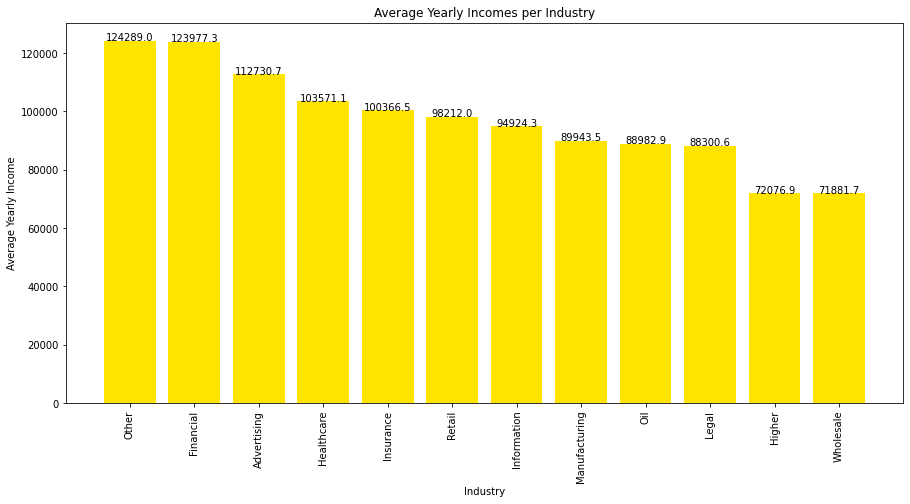

In [18]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
        
plt.figure(figsize = (15,7))
plt.bar(industries.Industry, industries['Average Income'], color = colour_scheme[1])
plt.xticks(rotation=90)
plt.title('Average Yearly Incomes per Industry')
plt.xlabel('Industry')
plt.ylabel('Average Yearly Income')
addlabels(industries.Industry, industries['Average Income'])
plt.show()

From the bar graph, it is observed that developers working in **Other industries, such as freelance, etc. are being paid the highest, on average (124289.0).** They are closely followed by developers working in **Financial Services (123977.3).**

#### Pie Chart - Number of Developers working in each Industry

In [19]:
label = []
for index, value in enumerate(industries.Industry):
    percent = round(((industries['Count'][index]/industries['Count'].sum())*100),2)
    label.append(f'{value}: {percent}%')

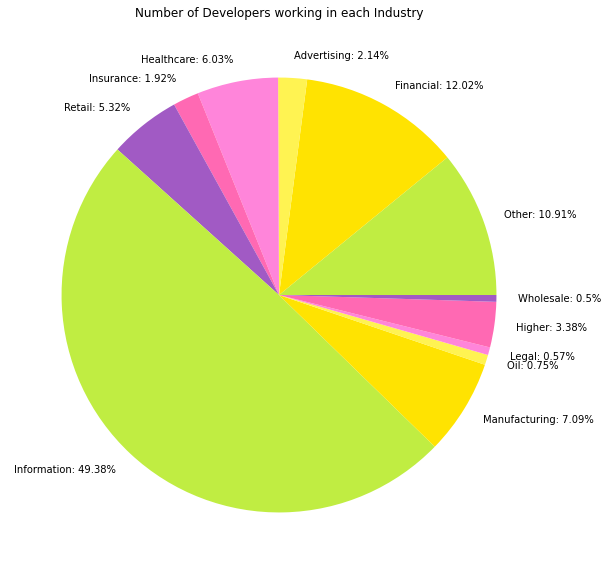

In [20]:
plt.figure(figsize = (10,10))
plt.pie(industries['Count'], labels = label, colors = colour_scheme)
plt.title('Number of Developers working in each Industry')
plt.show()

From the pie chart, it is clear that **almost half the number of developers work in the Information Services Industry.** The Financial Services Industry is the next most popular, at about 12.02% developers working here. It is also one of the most highly paying industries.

### How much does remote working matter to employees?

In [21]:
# Getting an idea of the data
results.RemoteWork.value_counts()

RemoteWork
Hybrid (some remote, some in-person)    31131
Remote                                  30566
In-person                               12113
Name: count, dtype: int64

In [22]:
remote_percent = (results.RemoteWork.value_counts()/results.RemoteWork.value_counts().sum())*100

#### Pie Chart - People in Respective Work Modes

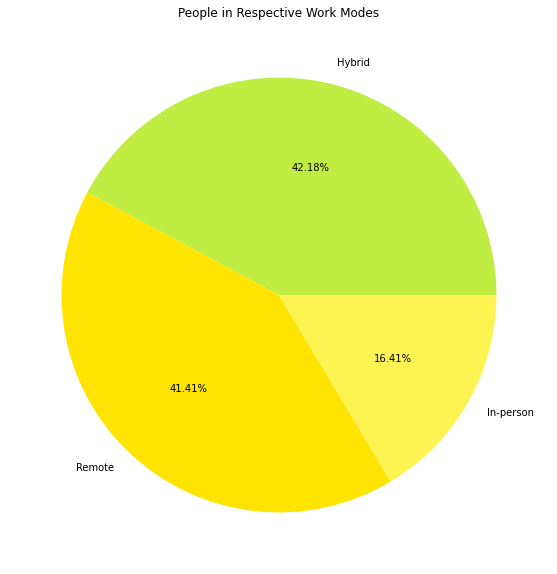

In [23]:
plt.figure(figsize = (10,10))
plt.pie(remote_percent, labels = ['Hybrid', 'Remote', 'In-person'], colors = colour_scheme, autopct='%1.2f%%')
plt.title('People in Respective Work Modes')
plt.show()

From the pie chart, it is clear that **significantly more people are working remotely (41.41%) or in hybrid format(42.18%) than in-person(16.41%).**

### How does coding experience affect the level of pay?

In [24]:
# Taking a look at YearsCode, YearsCodePro and ConvertedCompYearly
coding = results.loc[results.index,['YearsCode','YearsCodePro', 'ConvertedCompYearly']]

In [25]:
coding.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89184 entries, 0 to 89183
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YearsCode            87435 non-null  object 
 1   YearsCodePro         66136 non-null  object 
 2   ConvertedCompYearly  48019 non-null  float64
dtypes: float64(1), object(2)
memory usage: 2.7+ MB


In [26]:
#Replacing null values with 0 and Less than 1 year to 0.5 and more than 50 to 50.5
coding = coding.fillna(0)

coding

,YearsCode,YearsCodePro,ConvertedCompYearly
0,0,0,0.0
1,18,9,285000.0
2,27,23,250000.0
3,12,7,156000.0
4,6,4,23456.0
...,...,...,...
89179,20,5,0.0
89180,5,0,0.0
89181,10,0,0.0
89182,3,0,0.0


In [27]:
coding.loc[coding.YearsCode == 'Less than 1 year', 'YearsCode'] = 0.5
coding.loc[coding.YearsCode == 'More than 50 years', 'YearsCode'] = 50.5
coding.YearsCode = coding.YearsCode.astype(float)

coding.loc[coding.YearsCodePro == 'Less than 1 year', 'YearsCodePro'] = 0.5
coding.loc[coding.YearsCodePro == 'More than 50 years', 'YearsCodePro'] = 50.5
coding.YearsCodePro = coding.YearsCodePro.astype(float)

In [28]:
# Finding the correlation values

corr_all = coding.ConvertedCompYearly.corr(coding.YearsCode)
corr_pro = coding.ConvertedCompYearly.corr(coding.YearsCodePro)

print(f'Correlation between Annual Income and Years of Experience in Coding: {round(corr_all,4)}')
print(f'\nCorrelation between Annual Income and Years of Experience in Coding Professionally: {round(corr_pro,4)}')

Correlation between Annual Income and Years of Experience in Coding: 0.0446

Correlation between Annual Income and Years of Experience in Coding Professionally: 0.0562


Thus there is a **low positive correlation** between Annual Income and Years of Experience in Coding (0.0446). However, there is a **moderate positive correlation** between Annual Income and Years of Experience in Coding Professionally (0.0562).

This can be further visualised with a scatterplot.

#### Scatter Plot - Correlation between Level of Pay and Coding Experience

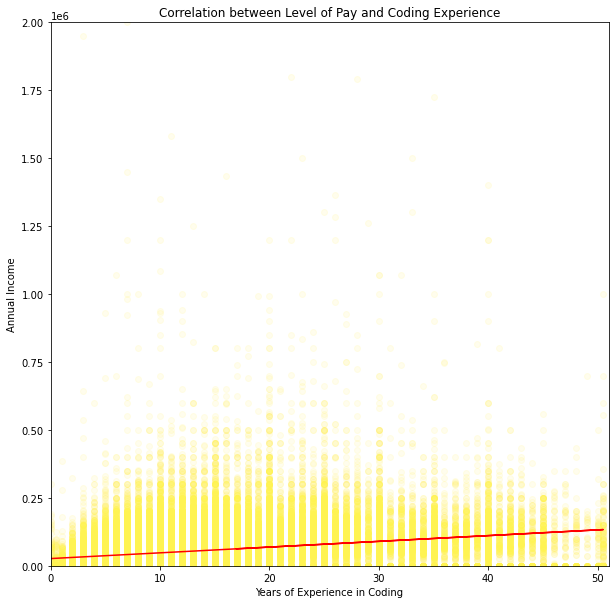

In [29]:
a, b = np.polyfit(coding.YearsCode, coding.ConvertedCompYearly, 1)
plt.figure(figsize = (10,10))
plt.scatter(coding.YearsCode, coding.ConvertedCompYearly, color = colour_scheme[2], alpha = 0.1)
plt.plot(coding.YearsCode, a*coding.YearsCode+b, color = 'red')
plt.title('Correlation between Level of Pay and Coding Experience')
plt.xlabel('Years of Experience in Coding')
plt.ylabel('Annual Income')
plt.axis([0, 51, 0, 2000000])
plt.show()

#### Scatter Plot - Correlation between Level of Pay and Professional Coding Experience

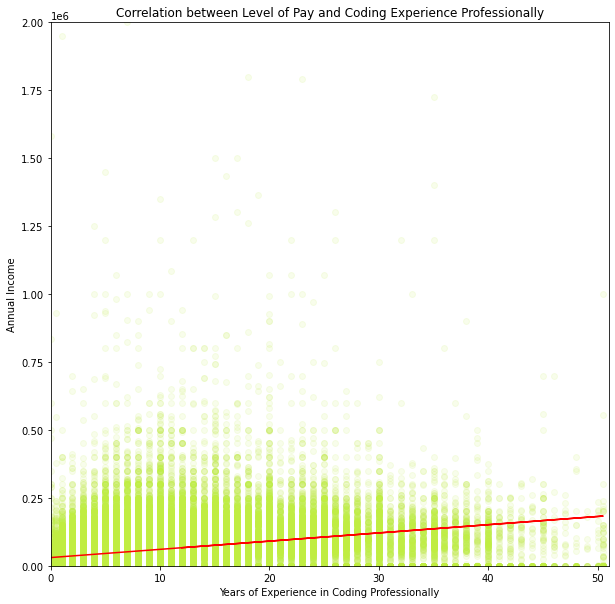

In [30]:
c, d = np.polyfit(coding.YearsCodePro, coding.ConvertedCompYearly, 1)
plt.figure(figsize = (10,10))
plt.scatter(coding.YearsCodePro, coding.ConvertedCompYearly, color = colour_scheme[0], alpha = 0.1)
plt.plot(coding.YearsCodePro, c*coding.YearsCodePro+d, color = 'red')
plt.title('Correlation between Level of Pay and Coding Experience Professionally')
plt.xlabel('Years of Experience in Coding Professionally')
plt.ylabel('Annual Income')
plt.axis([0, 51, 0, 2000000])
plt.show()

### What is the most popular method of learning to code?

In [31]:
# Taking a look at LearnCode
results.LearnCode.value_counts()

LearnCode
Other online resources (e.g., videos, blogs, forum)                                                                                                                                                             4873
Books / Physical media;Other online resources (e.g., videos, blogs, forum)                                                                                                                                      3300
Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc)                                                                                                                     3070
Books / Physical media;Online Courses or Certification;Other online resources (e.g., videos, blogs, forum)                                                                                                      3024
Online Courses or Certification;Other online resources (e.g., videos, blogs, forum)                                                       

In [32]:
# Counting the options
learn_count = []
for value in results.LearnCode:
    try:
        learn_count.append(value.split(';'))
    except:
        pass

In [33]:
# Flattening list and making a series
def flatten(l):
    return [item for sublist in l for item in sublist]

learn_count = flatten(learn_count)
learn_count = pd.Series(learn_count)

In [34]:
learn_count.value_counts()

Other online resources (e.g., videos, blogs, forum)    70244
Books / Physical media                                 45406
School (i.e., University, College, etc)                43957
Online Courses or Certification                        43201
On the job training                                    40380
Colleague                                              20523
Friend or family member                                 9936
Coding Bootcamp                                         8602
Hackathons (virtual or in-person)                       7033
Other (please specify):                                 5451
Name: count, dtype: int64

In [35]:
# Making a dataframe
modes_list = [
    'Online Videos, Blogs, Forums',
    'Books',
    'School',
    'Online Certification Courses',
    'On-the-job Tranining',
    'Colleague',
    'Friend or Family',
    'Coding Bootcamp',
    'Hackathons',
    'Other'
]

learncode = pd.DataFrame(modes_list, columns = ['Modes of Learning'])
learncode['Count'] = list(learn_count.value_counts())

In [36]:
learncode

,Modes of Learning,Count
0,"Online Videos, Blogs, Forums",70244
1,Books,45406
2,School,43957
3,Online Certification Courses,43201
4,On-the-job Tranining,40380
5,Colleague,20523
6,Friend or Family,9936
7,Coding Bootcamp,8602
8,Hackathons,7033
9,Other,5451


#### Bar Graph - Popularity of Methods of Learning to Code

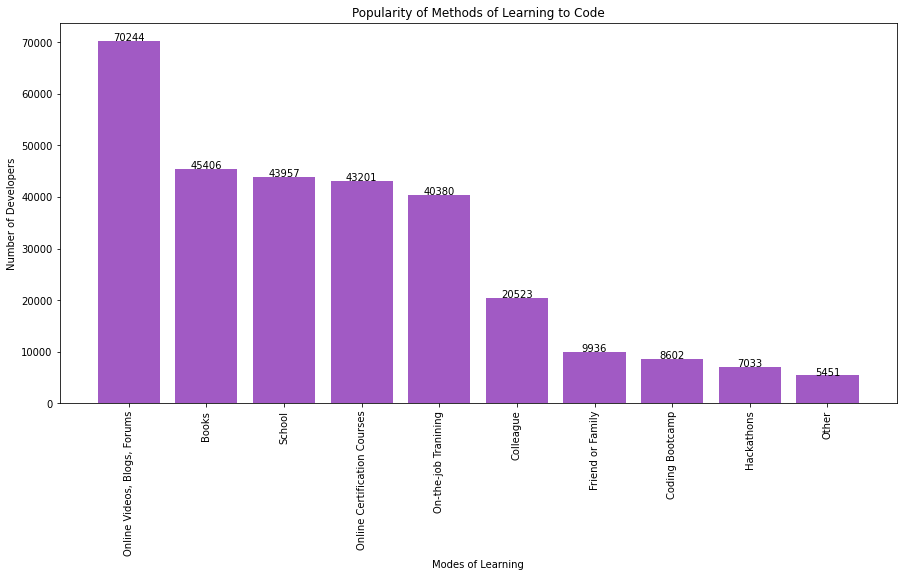

In [37]:
plt.figure(figsize = (15,7))
plt.bar(learncode['Modes of Learning'] , learncode.Count, color = colour_scheme[5])
                                                                               
plt.xticks(rotation=90)
plt.title('Popularity of Methods of Learning to Code')
plt.xlabel('Modes of Learning')
plt.ylabel('Number of Developers')
addlabels(learncode['Modes of Learning'] , learncode.Count)
plt.show()

From the bar graph, it is observed that the **most popular method of learning to code** is using **Online Videos, Blogs and Forums (70244).**

### Are you more likely to get a job as a developer if you have a master's degree?

In [38]:
# Taking a look at EdLevel
results.EdLevel.value_counts()

EdLevel
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          36706
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       20543
Some college/university study without earning a degree                                11753
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     8897
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                         3887
Associate degree (A.A., A.S., etc.)                                                    2807
Primary/elementary school                                                              1905
Something else                                                                         1475
Name: count, dtype: int64

In [39]:
# Making a dataframe of employed and unemployed developers
employed = results.loc[results.Industry.notna()]
unemployed = results.loc[results.Industry.isna()]

In [40]:
employed.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0
5,6,I agree,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Hobby;Professional development or self-paced l...,Some college/university study without earning ...,Books / Physical media;Colleague;Online Course...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,30-60 minutes a day,15-30 minutes a day,DevOps function;Microservices;Observability to...,Other,Appropriate in length,Neither easy nor difficult,96828.0
6,7,I agree,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Profe...,Some college/university study without earning ...,Friend or family member;Online Courses or Cert...,NaN,...,1-2 times a week,3-5 times a week,1-2 times a week,Less than 15 minutes a day,15-30 minutes a day,Microservices;Automated testing;Continuous int...,"Information Services, IT, Software Development...",Appropriate in length,Easy,135000.0


In [41]:
unemployed.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
8,9,I agree,"I am not primarily a developer, but I write co...",45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Contribute to open-source projects,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Online Courses or Certification;On the job tra...,Formal documentation provided by the owner of ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,64254.0
9,10,I agree,I am a developer by profession,25-34 years old,"Not employed, but looking for work",NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,NaN
11,12,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Online Courses or Certification;Other online r...,Formal documentation provided by the owner of ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,78003.0


In [42]:
employed.EdLevel.value_counts().sort_index()

EdLevel
Associate degree (A.A., A.S., etc.)                                                    1136
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          17510
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                        9927
Primary/elementary school                                                               173
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                         1679
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     1686
Some college/university study without earning a degree                                 4251
Something else                                                                          412
Name: count, dtype: int64

In [43]:
unemployed.EdLevel.value_counts().sort_index()

EdLevel
Associate degree (A.A., A.S., etc.)                                                    1671
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          19196
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       10616
Primary/elementary school                                                              1732
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                         2208
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     7211
Some college/university study without earning a degree                                 7502
Something else                                                                         1063
Name: count, dtype: int64

In [44]:
edlevel_names = [
    'Associate Degree',
    "Bachelor's",
    "Master's",
    'Primary School',
    'Professional Degree',
    'Secondary School',
    'College Study without Degree', 
    'Other'
]
edlevel = pd.DataFrame(edlevel_names, columns = ['Highest Education Level'])
edlevel['Employed'] = list(employed.EdLevel.value_counts().sort_index())
edlevel['Unemployed'] = list(unemployed.EdLevel.value_counts().sort_index())

In [45]:
edlevel['Employment Percentage'] = round(((edlevel.Employed/(edlevel.Unemployed+edlevel.Employed))*100),2)

In [46]:
edlevel.sort_values('Employment Percentage', ascending = False, ignore_index = True, inplace = True)

In [47]:
edlevel

,Highest Education Level,Employed,Unemployed,Employment Percentage
0,Master's,9927,10616,48.32
1,Bachelor's,17510,19196,47.70
2,Professional Degree,1679,2208,43.20
3,Associate Degree,1136,1671,40.47
4,College Study without Degree,4251,7502,36.17
5,Other,412,1063,27.93
6,Secondary School,1686,7211,18.95
7,Primary School,173,1732,9.08


#### Bar Graph - Number of Employed and Unemployed Developers per Highest Education Level

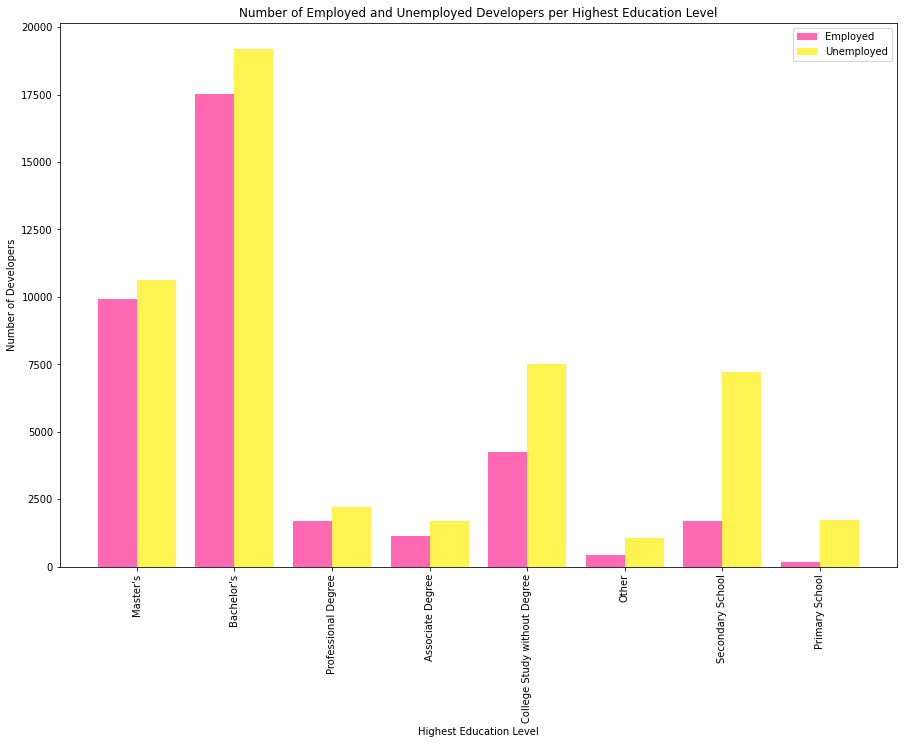

In [48]:
X_axis = np.arange(len(edlevel['Highest Education Level']))

plt.figure(figsize = (15,10))

plt.bar(X_axis - 0.2 , edlevel['Employed'], 0.4 , color = colour_scheme[4], label = 'Employed')
plt.bar(X_axis + 0.2 , edlevel['Unemployed'], 0.4 , color = colour_scheme[2], label = 'Unemployed')
                                                                               
plt.xticks(X_axis, edlevel['Highest Education Level'], rotation = 90)
plt.title('Number of Employed and Unemployed Developers per Highest Education Level')
plt.xlabel('Highest Education Level')
plt.ylabel('Number of Developers')
plt.legend()
plt.show()

#### Bar Graph - Employment Percentage versus Highest Education Level

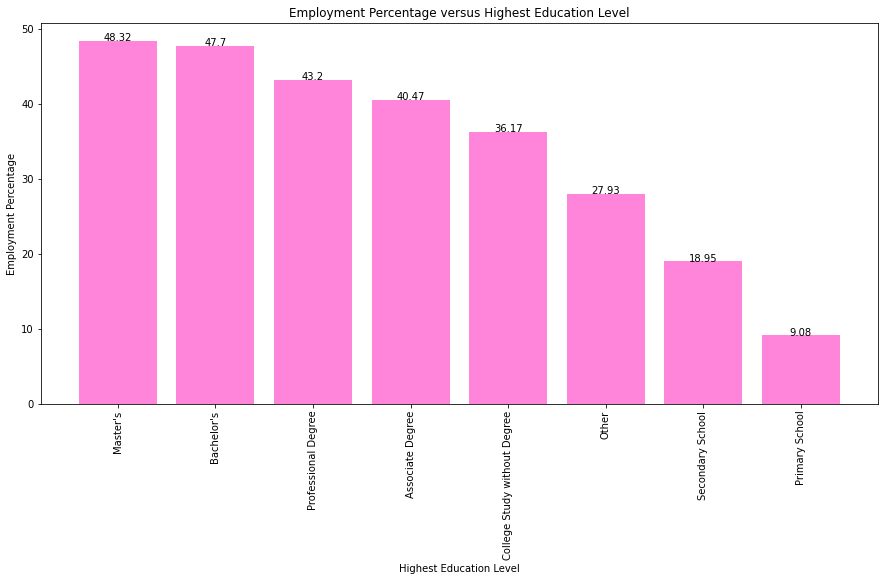

In [49]:
plt.figure(figsize = (15,7))
plt.bar(edlevel['Highest Education Level'] , edlevel['Employment Percentage'] , color = colour_scheme[3])
                                                                               
plt.xticks(rotation=90)
plt.title('Employment Percentage versus Highest Education Level')
plt.xlabel('Highest Education Level')
plt.ylabel('Employment Percentage')
addlabels(edlevel['Highest Education Level'] , edlevel['Employment Percentage'])
plt.show()

From the bar graphs, it is observed that **developers holding a Bachelor's degree are much more in number**, both employed and unemployed. It is also clear that **developers having a Master's Degree have the highest Employment Percentage (48.32%).** However, it is **not significantly more than those holding only a Bachelor's Degree (47.7%).** 